### Diagnosing Bias and Variance
To fix a high bias problem, you can:
* try adding polynomial features
* try getting additional features
* try decreasing the regularization parameter

To fix a high variance problem, you can:
* try increasing the regularization parameter
* try smaller sets of features
* get more training examples

You will try all these tips in this lab. Let's begin!

## Imports

In [238]:
import sklearn
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


## Fixing High Bias
We will first look at things to try when your model is underfitting. In other words, when the training error is far worse than the baseline level of performance

### Try adding polynomial features

In [239]:
# Split the dataset into train, cv, and test
def prepare_data(path): 
    data = np.loadtxt(path, delimiter=',')
    X = data[:, :-1]
    y = data[:, -1]
    
    X_train, x_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=80)
    X_cv, X_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.5, random_state=80)
    return X_train, y_train, X_cv, y_cv, X_test, y_test

    
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_data('data/c2w3_lab2_data1.csv')


In [240]:
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

# Preview the first 5 rows
print(f"first 5 rows of the training x inputs (1 feature):\n {x_train[:5]}\n")
print(f"first 5 rows of the training y inputs :\n {y_train[:5]}\n")


the shape of the training set (input) is: (60, 1)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 1)
the shape of the cross validation set (target) is: (20,)

first 5 rows of the training x inputs (1 feature):
 [[3757.57575758]
 [2878.78787879]
 [3545.45454545]
 [1575.75757576]
 [1666.66666667]]

first 5 rows of the training y inputs :
 [414.05124428 335.23243533 399.21628966 227.75644165 181.51848793]



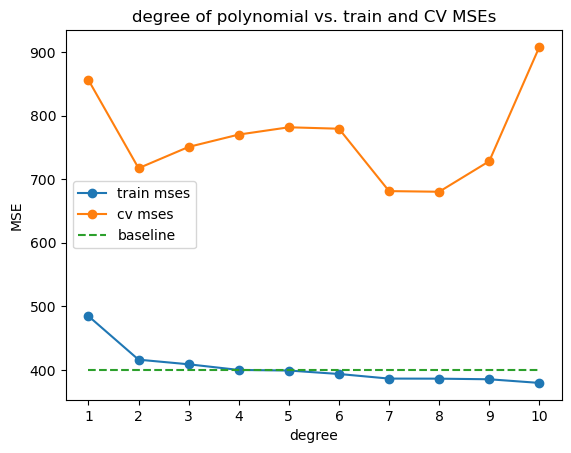

In [241]:
# Try polynomial features
linear_model = LinearRegression()
def train_plot_poly(model: LinearRegression, x_train, y_train, x_cv, y_cv, max_degree=10, baseline=None): 
    train_mses = []
    cv_mses = []
    models = []
    scalers = []
    degrees = range(1, max_degree + 1)
    
    # Loop over 10 times. Each adding one more degree of polynomial higher than the last
    for degree in degrees: 
        # Add polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        x_train_mapped = poly.fit_transform(x_train)
        x_cv_mapped = poly.transform(x_cv)
        
        # Standardize 
        poly_scaler = StandardScaler()
        x_train_mapped_scaled = poly_scaler.fit_transform(x_train_mapped)
        x_cv_mapped_scaled = poly_scaler.transform(x_cv_mapped)
        scalers.append(poly_scaler)
        
        # Create and train model 
        model.fit(x_train_mapped_scaled, y_train)
        models.append(model)
        
        # Compute mse for train dataset
        yhat = model.predict(x_train_mapped_scaled)
        train_mse = mean_squared_error(y_train, yhat)/2
        
        yhat_cv = model.predict(x_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv, yhat_cv)/2
        
        train_mses.append(train_mse)
        cv_mses.append(cv_mse)
        
    plt.plot(degrees, train_mses, marker='o', label="train mses")
    plt.plot(degrees, cv_mses, marker='o', label='cv mses')
    plt.plot(degrees, np.repeat(baseline, len(degrees)), linestyle='--', label='baseline')
    plt.legend()
    plt.xticks(degrees)
    plt.title('degree of polynomial vs. train and CV MSEs')
    plt.xlabel("degree")
    plt.ylabel('MSE')
        
    # return train_mses, cv_mses, models, scalers, degrees, baseline

train_plot_poly(linear_model, x_train, y_train, x_cv, y_cv, baseline=400)
        

As you can see, the more polynomial features you add, the better the model fits to the training data. In this example, it even performed better than the baseline. At this point, you can say that the models with degree greater than 4 are low-bias because they perform close to or better than the baseline.

However, if the baseline is defined lower (e.g. you consulted an expert regarding the acceptable error), then the models are still considered high bias. You can then try other methods to improve this.

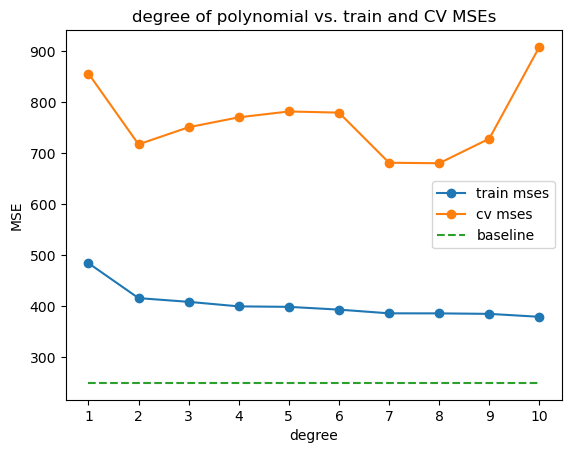

In [242]:
# Train and plot polynomial regression models. Bias is defined lower.
train_plot_poly(linear_model, x_train, y_train, x_cv, y_cv, max_degree=10, baseline=250)

### Try getting additional features

Another thing you can try is to acquire other features. Let's say that after you got the results above, you decided to launch another data collection campaign that captures another feature. Your dataset will now have 2 columns for the input features as shown below.

In [243]:
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_data('data/c2w3_lab2_data2.csv')
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

# Preview the first 5 rows
print(f"first 5 rows of the training inputs (2 features):\n {x_train[:5]}\n")

the shape of the training set (input) is: (60, 2)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 2)
the shape of the cross validation set (target) is: (20,)

first 5 rows of the training inputs (2 features):
 [[3.75757576e+03 5.49494949e+00]
 [2.87878788e+03 6.70707071e+00]
 [3.54545455e+03 3.71717172e+00]
 [1.57575758e+03 5.97979798e+00]
 [1.66666667e+03 1.61616162e+00]]



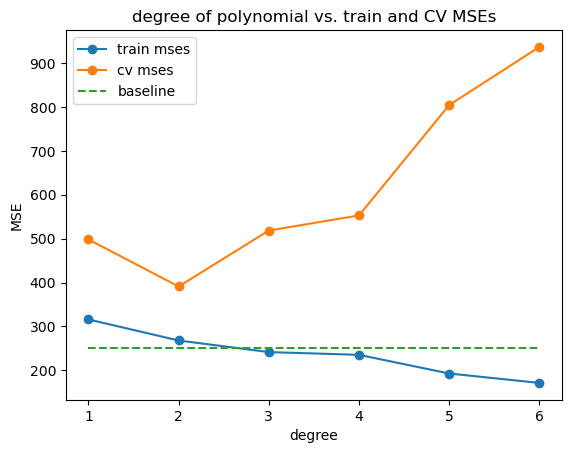

In [244]:
# Train and plot polynomial regression models. Dataset used has two features
train_plot_poly(linear_model, x_train, y_train, x_cv, y_cv, max_degree=6, baseline=250)

You'll notice that the training error is now closer to (or even better than) the base line. 
The line below trys to address overfitting problem on the 4th degree polynimal model using Ridge class which allows to use regularization parameters (lambda or $\lambda$)

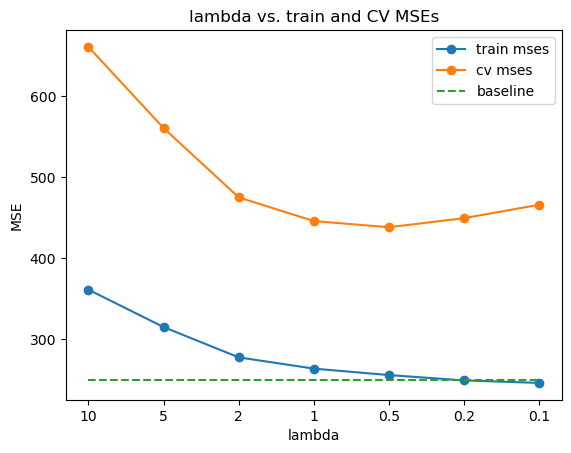

In [245]:
# Try polynomial features
linear_model = LinearRegression()
def train_plot_reg(reg_params, x_train, y_train, x_cv, y_cv, degree=1, baseline=None): 
    train_mses = []
    cv_mses = []
    models = []
    scalers = []
    
    # Loop over 10 times. Each adding one more degree of polynomial higher than the last
    for reg_param in reg_params: 
        # Add polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        x_train_mapped = poly.fit_transform(x_train)
        x_cv_mapped = poly.transform(x_cv)
        
        # Standardize 
        poly_scaler = StandardScaler()
        x_train_mapped_scaled = poly_scaler.fit_transform(x_train_mapped)
        x_cv_mapped_scaled = poly_scaler.transform(x_cv_mapped)
        scalers.append(poly_scaler)
        
        # Create and train model 
        model = Ridge(alpha=reg_param)
        model.fit(x_train_mapped_scaled, y_train)
        models.append(model)
        
        # Compute mse for train dataset
        yhat = model.predict(x_train_mapped_scaled)
        train_mse = mean_squared_error(y_train, yhat)/2
        
        yhat_cv = model.predict(x_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv, yhat_cv)/2
        
        train_mses.append(train_mse)
        cv_mses.append(cv_mse)
        
    reg_params = [str(x) for x in reg_params]
    plt.plot(reg_params, train_mses, marker='o', label="train mses")
    plt.plot(reg_params, cv_mses, marker='o', label='cv mses')
    plt.plot(reg_params, np.repeat(baseline, len(reg_params)), linestyle='--', label='baseline')
    plt.legend()
    plt.xticks(reg_params)
    plt.title('lambda vs. train and CV MSEs')
    plt.xlabel("lambda")
    plt.ylabel('MSE')
        
    # return train_mses, cv_mses, models, scalers, degrees, baseline

reg_params = [10, 5, 2, 1, 0.5, 0.2, 0.1]
train_plot_reg(reg_params, x_train, y_train, x_cv, y_cv, baseline=250, degree=4)

The resulting plot shows when the alpha is 10, the training error is much worse than the baseline at that point. This implies that it placing the a huge penalty on the `w` parameters and this prevent the model from learning the complex patterns in your data. As you decrease lambda, the model lossens this restriction and the training error is able to approach the baseline performance

## Fixing High Variance 
We will now look at something to try when model has overfit the training set. The main objective is to have a model that generalizes well to new examples so you want to minimize the cross validation error

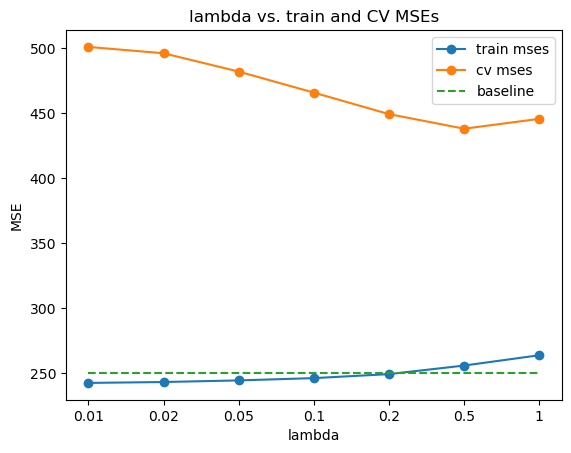

In [246]:
# Define lambdas to plot
reg_params = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

# Define degree of polynomial and train for each value of lambda
train_plot_reg(reg_params, x_train, y_train, x_cv, y_cv, degree= 4, baseline=250)

### Try smaller sets of features

You've already seen in the last lab that having too many polynomial terms can result in overfitting. You can reduce the number of such terms and see where you get the best balance of training and cross validation error. Another scenario where reducing the number of features would be helpful is when you have irrelevant features in your data. For example, patient IDs that hospitals give will not help in diagnosing a tumor so you should make sure to remove it from your training data. 

To illustrate how removing features can improve performance, you will do polynomial regression for 2 datasets: the same data you used above (2 features) and another with a random ID column (3 features). You can preview these using the cell below. Notice that 2 columns are identical and a 3rd one is added to include random numbers.

In [247]:
# Prepare dataset with randomID feature
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_data('data/c2w3_lab2_data2.csv')

# Preview the first 5 rows
print(f"first 5 rows of the training set with 2 features:\n {x_train[:5]}\n")

# Prepare dataset with randomID feature
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_data('data/c2w3_lab2_data3.csv')

# Preview the first 5 rows
print(f"first 5 rows of the training set with 3 features (1st column is a random ID):\n {x_train[:5]}\n")

first 5 rows of the training set with 2 features:
 [[3.75757576e+03 5.49494949e+00]
 [2.87878788e+03 6.70707071e+00]
 [3.54545455e+03 3.71717172e+00]
 [1.57575758e+03 5.97979798e+00]
 [1.66666667e+03 1.61616162e+00]]

first 5 rows of the training set with 3 features (1st column is a random ID):
 [[1.41929130e+07 3.75757576e+03 5.49494949e+00]
 [1.51868310e+07 2.87878788e+03 6.70707071e+00]
 [1.92662630e+07 3.54545455e+03 3.71717172e+00]
 [1.25222490e+07 1.57575758e+03 5.97979798e+00]
 [1.76537960e+07 1.66666667e+03 1.61616162e+00]]



Now you will train the models and plot the results. The solid lines in the plot show the errors for the data with 2 features while the dotted lines show the errors for the dataset with 3 features. As you can see, the one with 3 features has higher cross validation error especially as you introduce more polynomial terms. This is because the model is also trying to learn from the random IDs even though it has nothing to do with the target. 

Another way to look at it is to observe the points at degree=4. You'll notice that even though the *training error* is lower with 3 features, the *gap between the training error and cross validation error* is a lot wider than when you only use 2 features. This should also warn you that the model is overfitting.

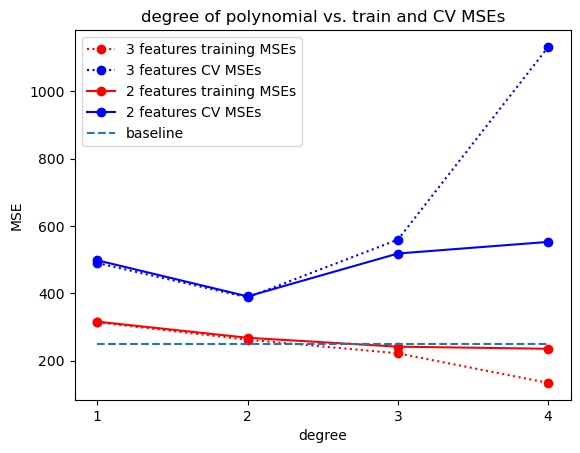

In [248]:
def train_plot_diff_datasets(model, files, max_degree=10, baseline=None):
    
    for file in files:
        
        x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_data(file['filename'])

        train_mses = []
        cv_mses = []
        models = []
        scalers = []
        degrees = range(1,max_degree+1)

        # Loop over 10 times. Each adding one more degree of polynomial higher than the last.
        for degree in degrees:

            # Add polynomial features to the training set
            poly = PolynomialFeatures(degree, include_bias=False)
            X_train_mapped = poly.fit_transform(x_train)

            # Scale the training set
            scaler_poly = StandardScaler()
            X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
            scalers.append(scaler_poly)

            # Create and train the model
            model.fit(X_train_mapped_scaled, y_train )
            models.append(model)

            # Compute the training MSE
            yhat = model.predict(X_train_mapped_scaled)
            train_mse = mean_squared_error(y_train, yhat) / 2
            train_mses.append(train_mse)

            # Add polynomial features and scale the cross-validation set
            poly = PolynomialFeatures(degree, include_bias=False)
            X_cv_mapped = poly.fit_transform(x_cv)
            X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

            # Compute the cross-validation MSE
            yhat = model.predict(X_cv_mapped_scaled)
            cv_mse = mean_squared_error(y_cv, yhat) / 2
            cv_mses.append(cv_mse)

        # Plot the results
        plt.plot(degrees, train_mses, marker='o', c='r', linestyle=file['linestyle'], label=f"{file['label']} training MSEs"); 
        plt.plot(degrees, cv_mses, marker='o', c='b', linestyle=file['linestyle'], label=f"{file['label']} CV MSEs"); 

    plt.plot(degrees, np.repeat(baseline, len(degrees)), linestyle='--', label='baseline')
    plt.title("degree of polynomial vs. train and CV MSEs")
    plt.xticks(degrees)
    plt.xlabel("degree"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()


# Define the model
model = LinearRegression()

# Define properties of the 2 datasets
file1 = {'filename':'data/c2w3_lab2_data3.csv', 'label': '3 features', 'linestyle': 'dotted'}
file2 = {'filename':'data/c2w3_lab2_data2.csv', 'label': '2 features', 'linestyle': 'solid'}
files = [file1, file2]

# Train and plot for each dataset
train_plot_diff_datasets(model, files, max_degree=4, baseline=250)

## Get more training examples
Lastly, you can try to minimize the cross validation error by getting more examples. In the cell below, you will train a 4th degree polynomial model then plot the *learning curve* of your model to see how the errors behave when you get more examples.

In [249]:
def train_plot_learning_curve(model, x_train, y_train, x_cv, y_cv, degree= 1, baseline=None):
    
    train_mses = []
    cv_mses = []
    models = []
    scalers = []
    num_samples_train_and_cv = []
    percents = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

    # Loop over 10 times. Each adding one more degree of polynomial higher than the last.
    for percent in percents:
        
        num_samples_train = round(len(x_train) * (percent/100.0))
        num_samples_cv = round(len(x_cv) * (percent/100.0))
        num_samples_train_and_cv.append(num_samples_train + num_samples_cv)
        
        x_train_sub = x_train[:num_samples_train]
        y_train_sub = y_train[:num_samples_train]
        x_cv_sub = x_cv[:num_samples_cv]
        y_cv_sub = y_cv[:num_samples_cv]

        # Add polynomial features to the training set
        poly = PolynomialFeatures(degree, include_bias=False)
        X_train_mapped = poly.fit_transform(x_train_sub)

        # Scale the training set
        scaler_poly = StandardScaler()
        X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
        scalers.append(scaler_poly)

        # Create and train the model
        model.fit(X_train_mapped_scaled, y_train_sub)
        models.append(model)

        # Compute the training MSE
        yhat = model.predict(X_train_mapped_scaled)
        train_mse = mean_squared_error(y_train_sub, yhat) / 2
        train_mses.append(train_mse)

        # Add polynomial features and scale the cross-validation set
        poly = PolynomialFeatures(degree, include_bias=False)
        X_cv_mapped = poly.fit_transform(x_cv_sub)
        X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

        # Compute the cross-validation MSE
        yhat = model.predict(X_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv_sub, yhat) / 2
        cv_mses.append(cv_mse)

    # Plot the results
    plt.plot(num_samples_train_and_cv, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(num_samples_train_and_cv, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.plot(num_samples_train_and_cv, np.repeat(baseline, len(percents)), linestyle='--', label='baseline')
    plt.title("number of examples vs. train and CV MSEs")
    plt.xlabel("total number of training and cv examples"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()

the shape of the entire training set (input) is: (600, 2)
the shape of the entire training set (target) is: (600,)

the shape of the entire cross validation set (input) is: (200, 2)
the shape of the entire cross validation set (target) is: (200,)



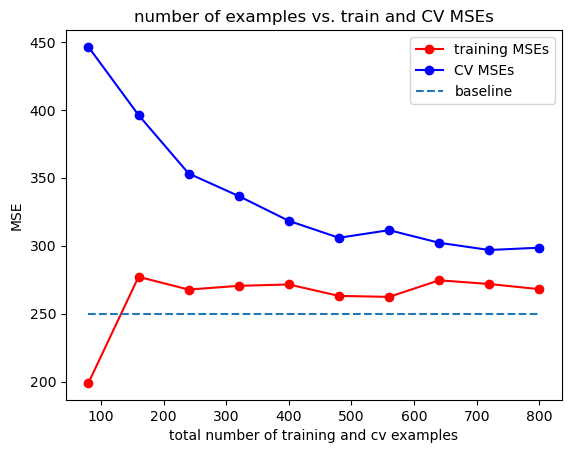

In [250]:
# Prepare the dataset
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_data('data/c2w3_lab2_data4.csv')
print(f"the shape of the entire training set (input) is: {x_train.shape}")
print(f"the shape of the entire training set (target) is: {y_train.shape}\n")
print(f"the shape of the entire cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the entire cross validation set (target) is: {y_cv.shape}\n")

# Instantiate the model class
model = LinearRegression()

# Define the degree of polynomial and train the model using subsets of the dataset.
train_plot_learning_curve(model, x_train, y_train, x_cv, y_cv, degree= 4, baseline=250)